<a href="https://colab.research.google.com/github/Akkijd/DataScience-projects/blob/main/ChromeApp%20Fake%20Review%20Analyzer/Chromeapp_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PART 1 - Q2**

##**Here’s the list of reviews of Chrome apps - scraped from Playstore.  DataSet Link**

Problem statement - There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating. 

Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users. 

Deploy it using - Flask/Streamlit etc and share the live link. 

Important
In this data app - the user will upload a csv and you would be required to display the reviews where the content doesn’t match ratings.  This csv will be in the same format as the DataSet Link


Bonus Points - If you deploy the app with Authentication. 


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [ ]:
chrome_app_review = pd.read_csv("/content/chrome_reviews.csv")

In [ ]:
chrome_app_review.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,12/19/2020,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,12/19/2020,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,12/19/2020,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,12/19/2020,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,12/19/2020,com.android.chrome


In [ ]:
chrome_app_review.shape

(3989, 10)

In [ ]:
chrome_app_review.columns

Index(['ID', 'Review URL', 'Text', 'Star', 'Thumbs Up', 'User Name',
       'Developer Reply', 'Version', 'Review Date', 'App ID'],
      dtype='object')

In [ ]:
#Our aim is to find out the postive reviews with 1 star rating so we can drop all the features except 'Text' and 'Star'
feature = ['ID','Review URL','Thumbs Up','User Name','Developer Reply','Version','Review Date','App ID']
chrome_app_review.drop(feature,axis=1,inplace=True)

In [ ]:
chrome_app_review.isnull().sum()

Text    0
Star    0
dtype: int64

In [ ]:
# #Removing the null values
# chrome_app_review.dropna(subset=['Text'], inplace=True)

In [ ]:
chrome_app_review.isnull().sum()

Text    0
Star    0
dtype: int64

#Pre-processing data

#**Some common Problems:**

1.Replace short words

2.Remove Punctuation



3.Making text lower case

4.Remove stopwords

5.Lemmatization

###**Replacing short words**

In [ ]:
#Replace apostrophe/short words in python
#Thanks to stack overflow - some of the words are not able to convert and also if we remove punctuation with spaces and apsotrophe will also get removed and then can't become can instead of cannot. If we expand such words we wil get more meaningful information.
import re

def decontracted(phrase):
  sen=[]
  for sentence in phrase:
    sentence= re.sub(r"won\'t", "will not", sentence)
    sentence= re.sub(r"Won\'t", "will not", sentence)
    sentence= re.sub(r"WON\'T", "will not", sentence)
    sentence = re.sub(r"can\'t", "cannot", sentence)
    sentence = re.sub(r"Can\'t", "cannot",sentence)
    sentence = re.sub(r"CAN\'T", "cannot",sentence)
    

    # general
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence= re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    sen.append(sentence)
  return sen



In [ ]:
text= chrome_app_review["Text"]

result = decontracted(text)


In [ ]:
chrome_app_review["Text_processed"]=result

In [ ]:
chrome_app_review.head(50)

,Text,Star,Text_processed
0,This is very helpfull aap.,5,This is very helpfull aap.
1,Good,3,Good
2,Not able to update. Neither able to uninstall.,1,Not able to update. Neither able to uninstall.
3,Nice app,4,Nice app
4,Many unwanted ads,1,Many unwanted ads
5,This app good,4,This app good
6,Yes yes,5,Yes yes
7,Awesome,5,Awesome
8,Very bad app 😞,1,Very bad app 😞
9,Many times I tried to update its not updating....,1,Many times I tried to update its not updating....


In [ ]:
#Short word removal
chrome_app_review['Text_processed'] = chrome_app_review['Text_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [ ]:
chrome_app_review['Text_processed'].head()

0                     This very helpfull aap.
1                                        Good
2    Not able update. Neither able uninstall.
3                                    Nice app
4                           Many unwanted ads
Name: Text_processed, dtype: object

###**Removing Punctuation(.!<>{}’,”(/)-)**

In [ ]:
# #Replacing punctuations
# import re
# reviews = []
# for review in chrome_app_review['Text']:
#   review= re.sub(r'[^\w\s]', '', str(review))
#   review = re.sub(r'\d','',review)
#   reviews.append(review)


In [ ]:
# Replacing punctuations
chrome_app_review['Text_processed'] = chrome_app_review['Text_processed'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
chrome_app_review = chrome_app_review[['Text','Text_processed','Star']]
chrome_app_review.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Text,Text_processed,Star
0,This is very helpfull aap.,This very helpfull aap,5
1,Good,Good,3
2,Not able to update. Neither able to uninstall.,Not able update Neither able uninstall,1
3,Nice app,Nice app,4
4,Many unwanted ads,Many unwanted ads,1


##**Lowercase characters**

In [ ]:
chrome_app_review['Text_processed'] = [text.lower() for text in chrome_app_review['Text_processed']]

In [ ]:
chrome_app_review['Text_processed']

0                                 this very helpfull aap 
1                                                    good
2                not able update  neither able uninstall 
3                                                nice app
4                                       many unwanted ads
                              ...                        
3984                                        gps good work
3985                                                     
3986                                                 good
3987                                                 cool
3988                                                 good
Name: Text_processed, Length: 3989, dtype: object

##**Lemmatization**
1) split sentence into words

2) get the detailed POS for each word

3) get shallow POS from detailed POS

4) do lemmatisation for each word
 
5) join all the words to form sentence

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


chrome_app_review['Text_processed'] = chrome_app_review['Text_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
chrome_app_review[['Text_processed','Star']].head()

,Text_processed,Star
0,this very helpfull aap,5
1,good,3
2,not able update neither able uninstall,1
3,nice app,4
4,many unwanted ad,1


##**Remove Stop Words**

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')
stop_words.remove("not")
stop_words.remove('no')

# Making custom list of words to be removed 
add_words = ['chrome','download','google','aap','app','ads','one','make','even','like','see','get','makes','making']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([word for word in review_tokenized  if word not in stop_words])
    return rev_new

# Removing stopwords
chrome_app_review['Text_processed'] = [remove_stopwords(r) for r in chrome_app_review['Text_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
chrome_app_review[['Text_processed','Star']].head()

,Text_processed,Star
0,helpfull,5
1,good,3
2,not able update neither able uninstall,1
3,nice,4
4,many unwanted ad,1


#**Sentiment Analysis**

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
sentiment = []

for sen in chrome_app_review["Text_processed"]:
    score = sid.polarity_scores(sen)
    #blob_score = TextBlob(sen).sentiment.polarity
    if (score['pos'] >= 0.5):
        sentiment.append('Positive')
    else:
        sentiment.append('Negative')
        


In [ ]:
chrome_app_review["sentiment"]=sentiment

In [ ]:
#test
a = chrome_app_review['Text_processed'][1]
print(a)
sid.polarity_scores(a)

good


{'compound': 0.4404, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0}

In [ ]:
chrome_app_review=chrome_app_review[["Text_processed","Star",'sentiment']]

In [ ]:
one_rating_review = chrome_app_review[chrome_app_review.Star ==1]
one_rating_review.reset_index(drop=True)

,Text_processed,Star,sentiment
0,not able update neither able uninstall,1,Negative
1,many unwanted ad,1,Negative
2,bad,1,Negative
3,many time tried update not updating whenever t...,1,Negative
4,not update not open say use old version plz up...,1,Negative
...,...,...,...
1049,unable update,1,Negative
1050,,1,Negative
1051,keep crash cant update go look good browser,1,Negative
1052,really hate new tabs appearance tab group eith...,1,Negative


In [ ]:
#These are the positive reviews with 1 star rating.
positive_review_one_star_rating = one_rating_review[one_rating_review.sentiment == 'Positive']
positive_review_one_star_rating.reset_index(drop=True)

,Text_processed,Star,sentiment
0,okk kind bad brave,1,Positive
1,good,1,Positive
2,good,1,Positive
3,best browse,1,Positive
4,not update disappointed,1,Positive
...,...,...,...
75,nice,1,Positive
76,not bad,1,Positive
77,nice,1,Positive
78,not update furious,1,Positive


In [ ]:
chrome_app_review.head()

,Text_processed,Star,sentiment
0,helpfull,5,Negative
1,good,3,Positive
2,not able update neither able uninstall,1,Negative
3,nice,4,Positive
4,many unwanted ad,1,Negative


In [ ]:
chrome_app_review["Text_processed"][0]=chrome_app_review["Text_processed"][0].replace("helpfull",'helpful')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Data is balanced here
chrome_app_review['sentiment'].value_counts()

Negative    2229
Positive    1760
Name: sentiment, dtype: int64

##**Plotting of words**

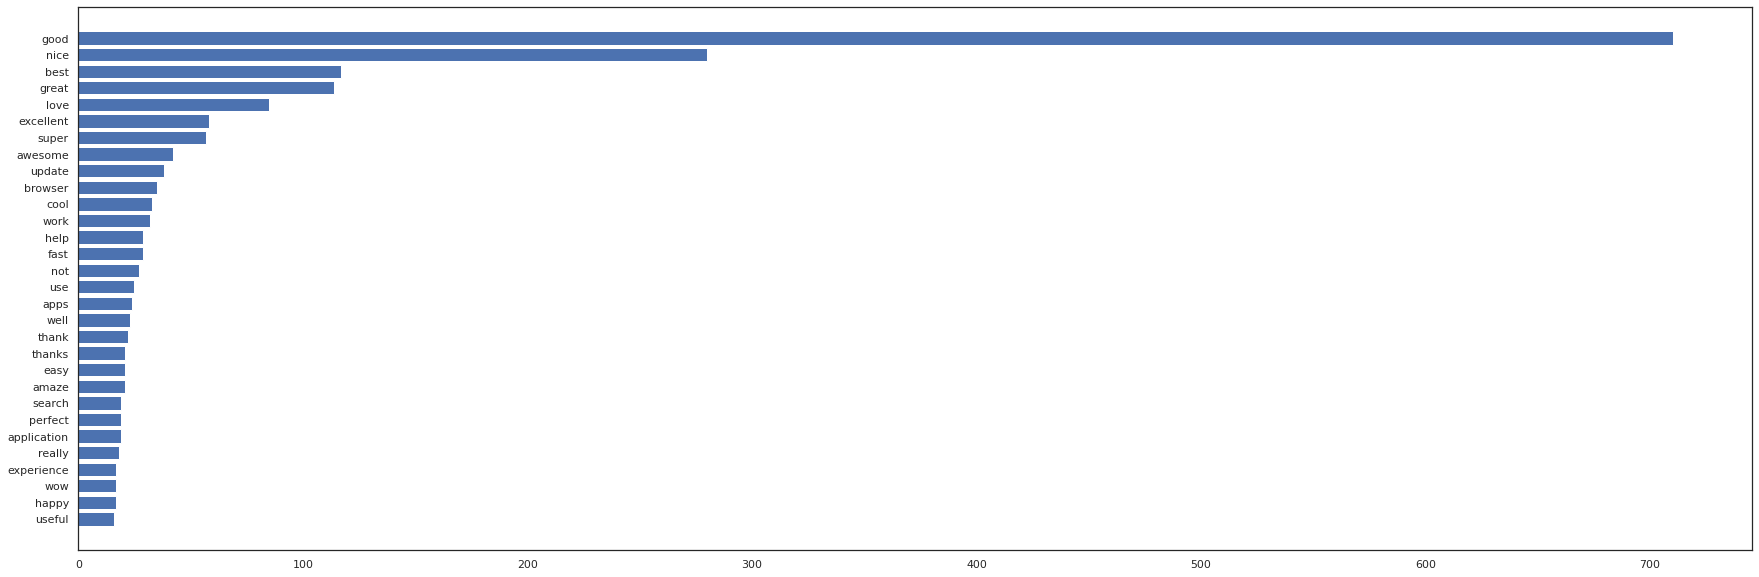

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = chrome_app_review.loc[chrome_app_review['sentiment'] == 'Positive']

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['Text_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(30,10))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

##**WordCloud**

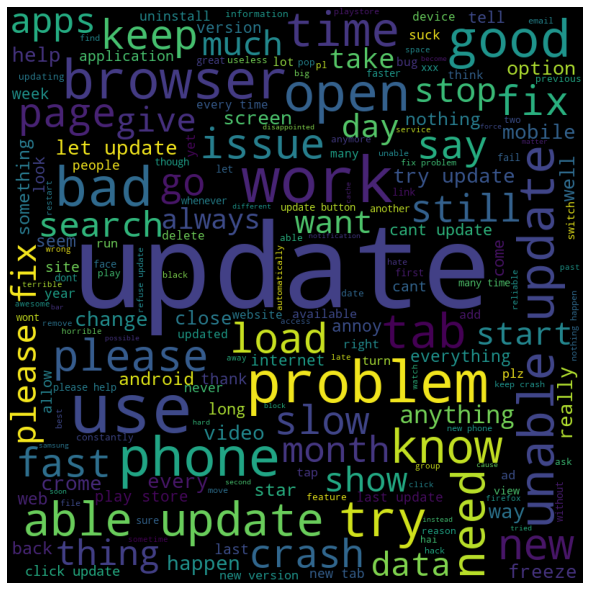

In [ ]:

## Building a Word Cloud for Negative reviews

from wordcloud import WordCloud
word_cloud_df = chrome_app_review.loc[chrome_app_review['sentiment'] == 'Negative']
all_words = ' '.join([text for text in word_cloud_df['Text_processed']])
# all_words = all_words.split()
# words_df = FreqDist(all_words)

# # Extracting words and frequency from words_df object
# words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
# words_df
# # Subsets top 30 words by frequency
# words_df = words_df.nlargest(columns="count", n = 50) 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

##**Bag of words model**

In [ ]:
chrome_app_review[["Text_processed"]]

,Text_processed
0,helpful
1,good
2,not able update neither able uninstall
3,nice
4,many unwanted ad
...,...
3984,gps good work
3985,
3986,good
3987,cool


In [ ]:
#Converting the text to numbers by using TF-IDFVectorizer (It will extract the words that has more weightage)
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 2000 tokens
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(chrome_app_review.Text_processed).toarray()
y = chrome_app_review.sentiment.map({'Positive' : 1, 'Negative' : 0}).values
featureNames = tfidf.get_feature_names()

X, y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([0, 1, 0, ..., 1, 1, 1]))

In [ ]:
#To get the feature names
# feature_names = tfidf.get_feature_names()
# feature_names

##**Train-Test split**

In [ ]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
X_train.shape, X_test.shape

((3191, 2000), (798, 2000))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Building ML model

###Decion Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print("Model accuracy is : {}".format(accuracy))

[[449  14]
 [ 16 319]]
Model accuracy is : 0.9624060150375939


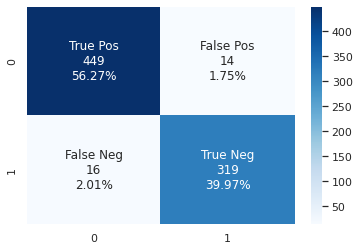

In [ ]:
#Visualization of Confusion matrix
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm1.flatten()/np.sum(cm1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm1, annot=labels, fmt="", cmap='Blues')

In [ ]:
#AUROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.9629509042261695

In [ ]:
#Finding out the important features
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False).reset_index(drop=True).head(50)

,Importance,word
0,0.249874,good
1,0.133520,nice
2,0.068107,great
3,0.065945,best
4,0.045779,love
5,0.039776,excellent
6,0.037869,super
7,0.031806,awesome
8,0.026028,cool
9,0.024377,not


###Naive Bayes classifier

In [ ]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
cm2 = confusion_matrix(y_test, y_pred)

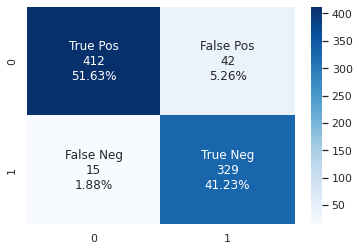

In [ ]:
#Visualization of Confusion matrix
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm2.flatten()/np.sum(cm2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm2, annot=labels, fmt="", cmap='Blues')

In [ ]:
#AUROC score
roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

0.9829263139022641

**We can see the Naive Bayes Classifier gives the best AUROC value when compare with Decion Tree classifier.**

